In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
sys.path.append('C:\\Users\\Bhujay_ROG\\MyDev\\OCLog\\oclog\hdfs')
##### appending the static path to aavoid the error 
# ModuleNotFoundError                       Traceback (most recent call last)
# Input In [9], in <cell line: 3>()
#       2 hdfs_obj_full_name_path = 'C:\\Users\\Bhujay_ROG\\MyDev\\OCLog\\oclog\\hdfs\\data\\hdfsobj_32_64_no_meta.pkl'
#       3 with open(hdfs_obj_full_name_path, 'rb') as f:
# ----> 4             hdfslogs = pickle.load(f)

# ModuleNotFoundError: No module named 'hdflogv3'
from oclog.BGL.mixed_log import MixedLog, get_embedding_layer
from oclog.hdfs.hdflogv3 import HDFSLogv3
import numpy as np
import pandas as pd
from oclog.openset.opensetv10 import OpenSet
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing

In [2]:
bglog = MixedLog(debug=True, 
                 padded_seq_len=32, 
                 padded_char_len=64, 
                 log_meta_status='no_meta',  
                 save_padded_num_sequences=True, 
                 load_from_pkl=False)
# train_test = bglog.get_tensor_train_val_test(ablation=1000, designated_ukc_cls=5 )
train_test = bglog.get_tensor_train_val_test(ablation=1000 )
train_data, val_data, test_data = train_test

ablation set to : 1000
log file path found:  True
total number of lines in the log file: 4747963
RAM usage:  39064728
ending logs in memory: 0.8407607078552246
alerts 4747963
unique_alerts: {'WARNING', '0x00544eb8,', 'single', 'Kill', 'SEVERE', 'microseconds', 'INFO', 'FAILURE', 'ERROR', 'FATAL'}
length of list of sequence 148373
elapsed time: 2.3060302734375
len of whole_text_for_training 4747936
character vocabulary 50
len of numseq:  148373
                                                 seq label
0  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
1  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
2  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
3  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
4  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
INFO       114115
FATAL       28439
ERROR        4049
WARNING       902
SEVERE        628
Kill          165
FAILURE        75
Name: label, dtype: int64
completed padding sequences in 167.67467498779

In [3]:
#### load the generated bglog and the hdfs log based on param setting the correct file shd be loaded
mlog = MixedLog(debug=True,
                mixed_logs=True,
                load_from_pkl=True,
                save_padded_num_sequences=False, 
                ablation=500, 
                 )
train_test = mlog.get_tensor_train_val_test(ablation=1000)
train_data, val_data, test_data = train_test

ablation set to : 1000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_64_no_meta.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_64_no_meta_tk.pkl
found existing hdfs saved object from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\hdfs\data\hdfsobj_32_64_no_meta.pkl
INFO            114115
FATAL            28439
hdfs_anomaly     16838
hdfs_normal      16838
ERROR             4049
WARNING            902
SEVERE             628
Kill               165
FAILURE             75
Name: label, dtype: int64
designated_ukc_cls: FAILURE not matched with current label: INFO
train_INFO:, 800, val_INFO:, 100, test_INFO:, 100
designated_ukc_cls: FAILURE not matched with current label: hdfs_anomaly
train_hdfs_anomaly:, 800, val_hdfs_anomaly:, 100, test_hdfs_anomaly:, 100
designated_ukc_cls: FAILURE not matched with current label: hdfs_normal
train_hdfs_normal:, 800, val_hdfs_normal:, 100, test_hdfs_normal:, 100
designated_uk

got all the dataset
vocab_size: 50
got all the dataset
2022-04-30 11:35:22.370409
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
150/150 [==============================] - ETA: 0s - loss: 0.5793 - accuracy: 0.7865 - precision: 0.8997 - recall: 0.6894
Epoch 1: val_accuracy improved from -inf to 0.96354, saving model to data\ptmodel_2022-04-30_11_35_22.370409\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-30_11_35_22.370409\assets
150/150 [==============================] - 17s 107ms/step - loss: 0.5793 - accuracy: 0.7865 - precision: 0.8997 - recall: 0.6894 - val_loss: 0.1672 - val_accuracy: 0.9635 - val_precision: 0.9685 - val_recall: 0.9601 - lr: 0.0010
Epoch 2/5
150/150 [==============================] - ETA: 0s - loss: 0.0823 - accuracy: 0.9719 - precision: 0.9719 - recall: 0.9719
Epoch 2: val_accuracy improved from 0.96354 to 0.99306, saving model to data\ptmodel_2022-04-30_11_35_22.370409\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-30_

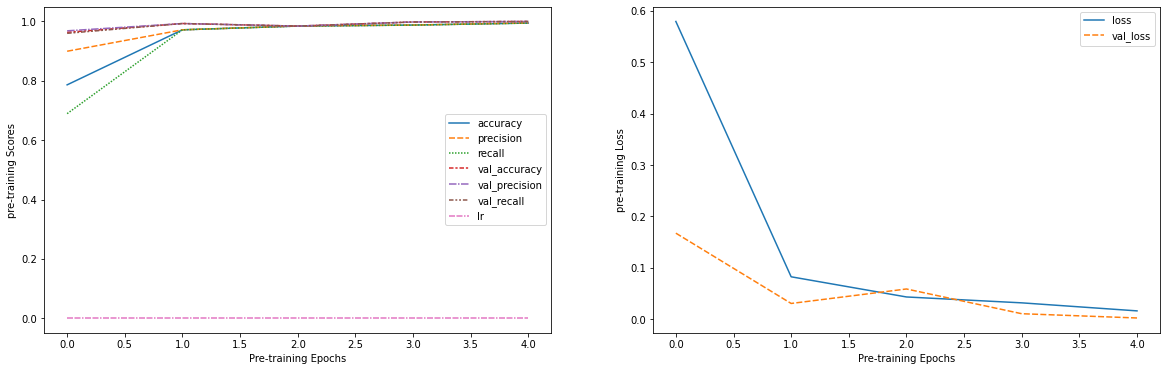

run_id:  2022-04-30_11_36_41.662354_b46a7fb4c84b11ec9121ac8247733f47


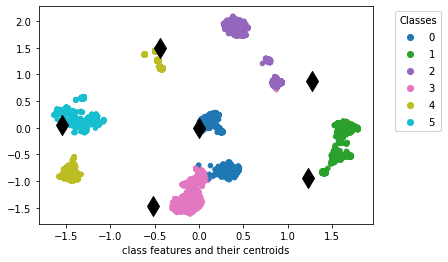

run_id:  2022-04-30_11_37_29.960309_d1342e94c84b11ec8594ac8247733f47


In [4]:
oset = OpenSet()
res = oset.extract_features_and_centroids(bglog=mlog, train_data=train_data, val_data=val_data, test_data=test_data)

In [7]:
### generate bglog with 32_176_time_ip
bglog = MixedLog(debug=True,
                 mixed_logs=False,
                 padded_seq_len=32, 
                 padded_char_len=176, 
                 log_meta_status='time_ip',  
                 save_padded_num_sequences=True, 
                 load_from_pkl=False)
# train_test = bglog.get_tensor_train_val_test(ablation=1000, designated_ukc_cls=5 )
train_test = bglog.get_tensor_train_val_test(ablation=1000 )
train_data, val_data, test_data = train_test

ablation set to : 1000
log file path found:  True
total number of lines in the log file: 4747963
RAM usage:  39064728
ending logs in memory: 0.7337238788604736
alerts 4747963
unique_alerts: {'WARNING', '0x00544eb8,', 'single', 'Kill', 'SEVERE', 'microseconds', 'INFO', 'FAILURE', 'ERROR', 'FATAL'}
length of list of sequence 148373
elapsed time: 2.4859704971313477
len of whole_text_for_training 4747936
character vocabulary 50
len of numseq:  148373
                                                 seq label
0  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
1  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
2  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
3  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
4  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
INFO       114115
FATAL       28439
ERROR        4049
WARNING       902
SEVERE        628
Kill          165
FAILURE        75
Name: label, dtype: int64
completed padding sequences in 168.13357567

In [8]:
## check loading from disk
mlog = MixedLog(debug=True,
                mixed_logs=True,
                padded_seq_len=32, 
                padded_char_len=176, 
                log_meta_status='time_ip',                
                save_padded_num_sequences=False,
                load_from_pkl=True,
                                 )
train_test = mlog.get_tensor_train_val_test(ablation=1000)
train_data, val_data, test_data = train_test

ablation set to : 1000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_176_no_meta.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_176_no_meta_tk.pkl
found existing hdfs saved object from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\hdfs\data\hdfsobj_32_176_no_meta.pkl
INFO            114115
FATAL            28439
hdfs_anomaly     16838
hdfs_normal      16838
ERROR             4049
WARNING            902
SEVERE             628
Kill               165
FAILURE             75
Name: label, dtype: int64
designated_ukc_cls: FAILURE not matched with current label: INFO
train_INFO:, 800, val_INFO:, 100, test_INFO:, 100
designated_ukc_cls: FAILURE not matched with current label: hdfs_anomaly
train_hdfs_anomaly:, 800, val_hdfs_anomaly:, 100, test_hdfs_anomaly:, 100
designated_ukc_cls: FAILURE not matched with current label: hdfs_normal
train_hdfs_normal:, 800, val_hdfs_normal:, 100, test_hdfs_normal:, 100
designated

got all the dataset
vocab_size: 50
got all the dataset
2022-04-30 12:23:04.322822
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
150/150 [==============================] - ETA: 0s - loss: 0.5027 - accuracy: 0.7998 - precision_1: 0.8883 - recall_1: 0.7104
Epoch 1: val_accuracy improved from -inf to 0.96875, saving model to data\ptmodel_2022-04-30_12_23_04.322822\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-30_12_23_04.322822\assets
150/150 [==============================] - 39s 256ms/step - loss: 0.5027 - accuracy: 0.7998 - precision_1: 0.8883 - recall_1: 0.7104 - val_loss: 0.1489 - val_accuracy: 0.9688 - val_precision_1: 0.9687 - val_recall_1: 0.9670 - lr: 0.0010
Epoch 2/5
150/150 [==============================] - ETA: 0s - loss: 0.0863 - accuracy: 0.9721 - precision_1: 0.9727 - recall_1: 0.9715
Epoch 2: val_accuracy improved from 0.96875 to 0.98958, saving model to data\ptmodel_2022-04-30_12_23_04.322822\
INFO:tensorflow:Assets written to: data\ptm

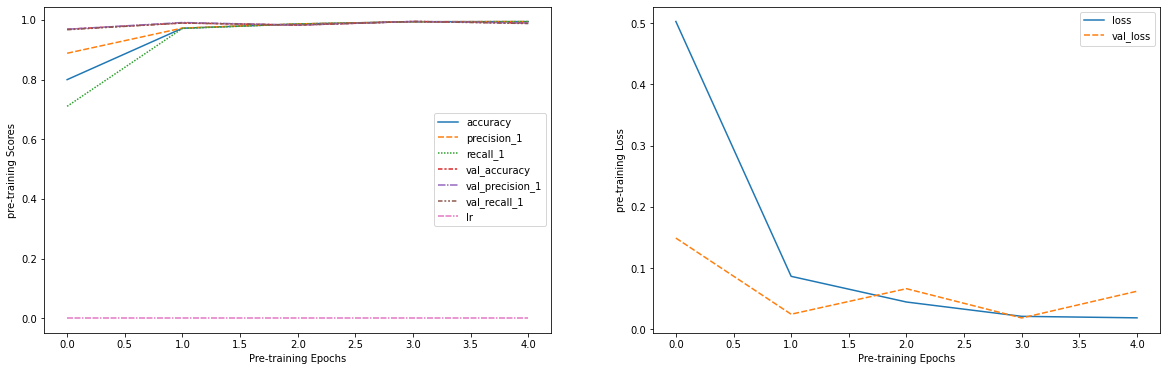

run_id:  2022-04-30_12_26_13.152562_9f8febfbc85211ec9a10ac8247733f47


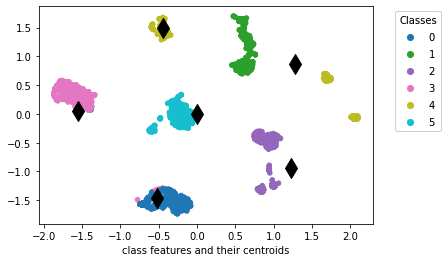

run_id:  2022-04-30_12_27_14.021255_c3d7bf4bc85211ec910fac8247733f47


In [9]:
oset = OpenSet()
res = oset.extract_features_and_centroids(bglog=mlog, train_data=train_data, val_data=val_data, test_data=test_data)

got all the dataset
vocab_size: 50
got all the dataset
2022-04-30 12:44:08.047314
starting to create ptmodel automatically
staring pre trining
Epoch 1/10
150/150 [==============================] - ETA: 0s - loss: 0.5016 - accuracy: 0.8017 - precision_2: 0.8836 - recall_2: 0.7198
Epoch 1: val_accuracy improved from -inf to 0.96875, saving model to data\ptmodel_2022-04-30_12_44_08.047314\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-30_12_44_08.047314\assets
150/150 [==============================] - 39s 253ms/step - loss: 0.5016 - accuracy: 0.8017 - precision_2: 0.8836 - recall_2: 0.7198 - val_loss: 0.0990 - val_accuracy: 0.9688 - val_precision_2: 0.9704 - val_recall_2: 0.9670 - lr: 0.0010
Epoch 2/10
150/150 [==============================] - ETA: 0s - loss: 0.1070 - accuracy: 0.9638 - precision_2: 0.9641 - recall_2: 0.9629
Epoch 2: val_accuracy improved from 0.96875 to 0.98958, saving model to data\ptmodel_2022-04-30_12_44_08.047314\
INFO:tensorflow:Assets written to: data\p

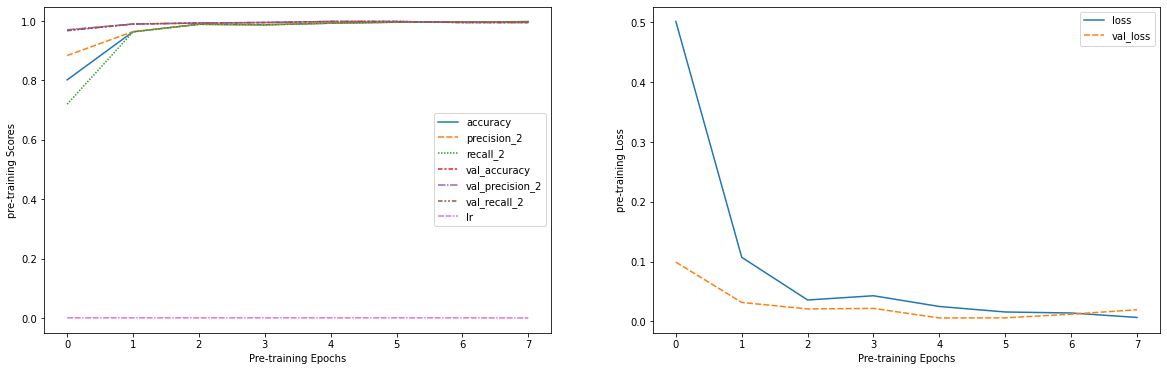

run_id:  2022-04-30_12_49_08.799397_d382f878c85511ecb5aaac8247733f47


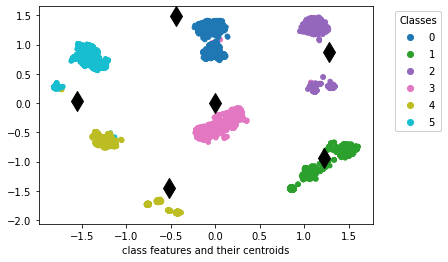

run_id:  2022-04-30_12_50_08.953826_f75dcedac85511ecb9adac8247733f47


In [10]:
#### with higher epochs
oset = OpenSet()
res = oset.extract_features_and_centroids(bglog=mlog, train_data=train_data, val_data=val_data, test_data=test_data, pt_epochs=10)

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_176_no_meta.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_176_no_meta_tk.pkl
found existing hdfs saved object from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\hdfs\data\hdfsobj_32_176_no_meta.pkl
designated_ukc_cls: FAILURE not matched with current label: INFO
train_INFO:, 800, val_INFO:, 100, test_INFO:, 100
designated_ukc_cls: FAILURE not matched with current label: hdfs_anomaly
train_hdfs_anomaly:, 800, val_hdfs_anomaly:, 100, test_hdfs_anomaly:, 100
designated_ukc_cls: FAILURE not matched with current label: hdfs_normal
train_hdfs_normal:, 800, val_hdfs_normal:, 100, test_hdfs_normal:, 100
designated_ukc_cls: FAILURE not matched with current label: FATAL
train_FATAL:, 800, val_FATAL:, 100, test_FATAL:, 100
designated_ukc_cls: FAILURE not matched with current label: ERROR
train_ERROR:, 800, val_ERROR:, 100, test_ERROR:, 100
designated_ukc_cls: FAILURE 

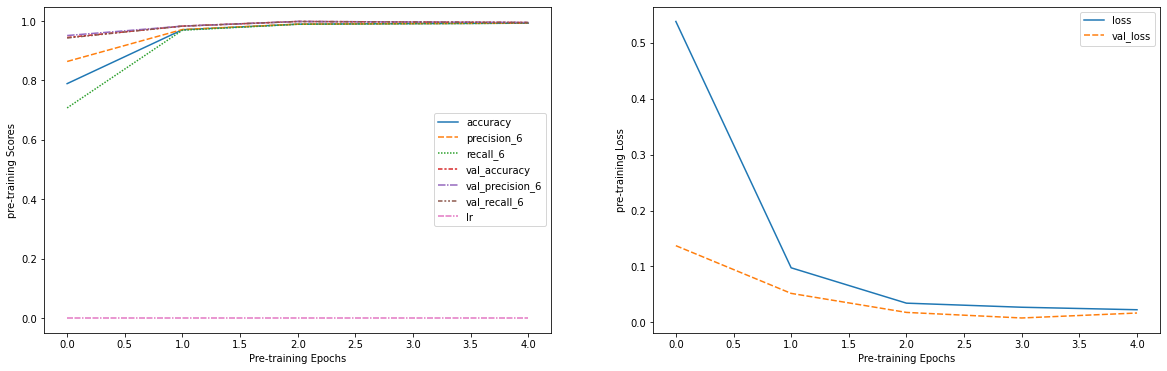

run_id:  2022-04-30_13_56_11.004090_30eeb346c85f11ec82cfac8247733f47


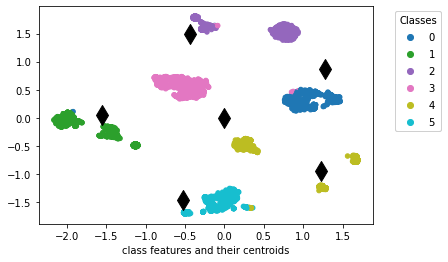

run_id:  2022-04-30_13_57_10.256375_543fe1a6c85f11ec85efac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.11it/s]


epoch: 1/50, train_loss: 6.306385517120361, F1_train: 0.2537646560119449 F1_val: 0.3337449009442515


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.13it/s]


epoch: 2/50, train_loss: 6.306400775909424, F1_train: 0.31446929308308486 F1_val: 0.36533638388791023


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.11it/s]


epoch: 3/50, train_loss: 6.306405067443848, F1_train: 0.3782957584416369 F1_val: 0.38357262825049937


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.13it/s]


epoch: 4/50, train_loss: 6.306402206420898, F1_train: 0.42088278175974597 F1_val: 0.4332022424508891


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.13it/s]


epoch: 5/50, train_loss: 6.30640983581543, F1_train: 0.47479503056975036 F1_val: 0.5186568151294964


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.07it/s]


epoch: 6/50, train_loss: 6.306402683258057, F1_train: 0.5387108744064225 F1_val: 0.5752361601824328


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.13it/s]


epoch: 7/50, train_loss: 6.306404113769531, F1_train: 0.5761910250217358 F1_val: 0.602994395561466


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.10it/s]


epoch: 8/50, train_loss: 6.306391716003418, F1_train: 0.5954823631900137 F1_val: 0.616320186382656


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.13it/s]


epoch: 9/50, train_loss: 6.306393146514893, F1_train: 0.6065127298451434 F1_val: 0.6197166691310422


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.13it/s]


epoch: 10/50, train_loss: 6.306397914886475, F1_train: 0.6114781307937385 F1_val: 0.6253953443751238


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.13it/s]


epoch: 11/50, train_loss: 6.306423664093018, F1_train: 0.6154559779527553 F1_val: 0.6232638888888888


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.13it/s]


epoch: 12/50, train_loss: 6.306396961212158, F1_train: 0.6233004174479624 F1_val: 0.6393513794406651


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.13it/s]


epoch: 13/50, train_loss: 6.306395530700684, F1_train: 0.62775759031306 F1_val: 0.639163424879195


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.01it/s]


epoch: 14/50, train_loss: 6.306397914886475, F1_train: 0.6313994939612574 F1_val: 0.6393065752153446


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.12it/s]


epoch: 15/50, train_loss: 6.306421279907227, F1_train: 0.6338307180385282 F1_val: 0.6416040499235863


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.05it/s]


epoch: 16/50, train_loss: 6.306397914886475, F1_train: 0.6362913868316642 F1_val: 0.6448368526615087


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.08it/s]


epoch: 17/50, train_loss: 6.306402206420898, F1_train: 0.6384875558195456 F1_val: 0.6361528329471478


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.09it/s]


epoch: 18/50, train_loss: 6.306394100189209, F1_train: 0.6397103934069 F1_val: 0.6508905234394162


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.13it/s]


epoch: 19/50, train_loss: 6.306411266326904, F1_train: 0.6417126702953377 F1_val: 0.6485068920730686


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.12it/s]


epoch: 20/50, train_loss: 6.306395530700684, F1_train: 0.6433380464911966 F1_val: 0.6489545522464212


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.12it/s]


epoch: 21/50, train_loss: 6.306393623352051, F1_train: 0.6444241815325517 F1_val: 0.6426158232863531


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.05it/s]


epoch: 22/50, train_loss: 6.306397914886475, F1_train: 0.6678787200119649 F1_val: 0.6430131023881024


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.10it/s]


epoch: 23/50, train_loss: 6.306406021118164, F1_train: 0.6683045764087882 F1_val: 0.6486394825626435


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.06it/s]


epoch: 24/50, train_loss: 6.306411266326904, F1_train: 0.6691336869937207 F1_val: 0.6453177180619234


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.12it/s]


epoch: 25/50, train_loss: 6.306398391723633, F1_train: 0.6691336869937207 F1_val: 0.6479939731595361
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.12it/s]


epoch: 26/50, train_loss: 6.306392192840576, F1_train: 0.6692645498971628 F1_val: 0.6472391863016863


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.01it/s]


epoch: 27/50, train_loss: 6.306403636932373, F1_train: 0.6713110269553695 F1_val: 0.6516507464244702


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.11it/s]


epoch: 28/50, train_loss: 6.30640983581543, F1_train: 0.6714413415510929 F1_val: 0.6520389332889333


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:50<00:00,  2.97it/s]


epoch: 29/50, train_loss: 6.306405544281006, F1_train: 0.6718188211200112 F1_val: 0.6418454958397012


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.09it/s]


epoch: 30/50, train_loss: 6.3063836097717285, F1_train: 0.6719601762135475 F1_val: 0.6420317261553288


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.05it/s]


epoch: 31/50, train_loss: 6.306395053863525, F1_train: 0.6720903088056457 F1_val: 0.6446549843091105


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.09it/s]


epoch: 32/50, train_loss: 6.306392192840576, F1_train: 0.6722314582917732 F1_val: 0.6456813417190775


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.09it/s]


epoch: 33/50, train_loss: 6.306373596191406, F1_train: 0.6722314582917732 F1_val: 0.6411348344801799
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:50<00:00,  2.98it/s]


epoch: 34/50, train_loss: 6.306400299072266, F1_train: 0.6722314582917732 F1_val: 0.6477560468631897
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.01it/s]


epoch: 35/50, train_loss: 6.3063859939575195, F1_train: 0.6722314582917732 F1_val: 0.6501784580646093
train score not improving  going to wait state 3
val score not improving  going to wait state 3


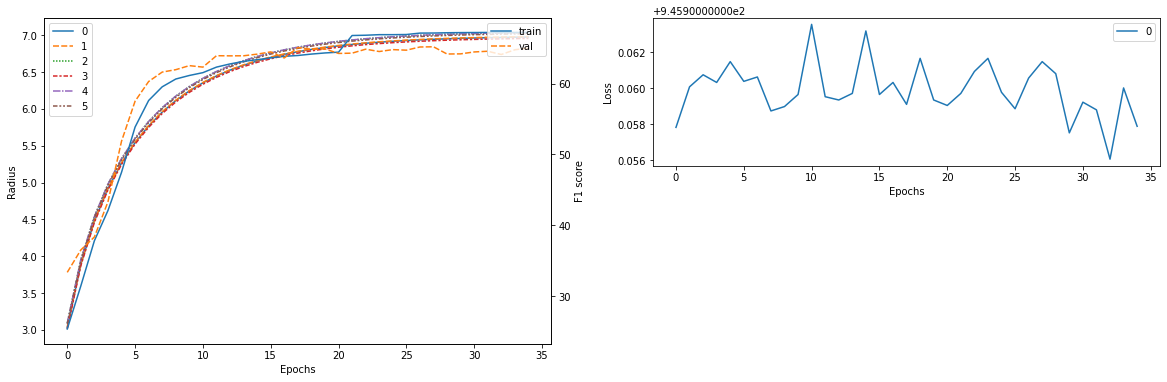

classification report for training:
[[632   0   0   0   0   0 168]
 [  0 176   0   0   0   0 624]
 [  0   0 605   0   0   0 195]
 [  0   0   0 575   0   0 225]
 [  0   0   0   0  41   0 759]
 [  0   0   0   0   0 792   8]
 [  0   0   0   0   0   0   0]]
58.77
f1_weighted: 0.6722314582917732, f1_macro: 0.57619839282152, f1_micro: 0.5877083333333334, f_measure: {'Known': 67.2231, 'Open': 0, 'F1-score': 57.6198}
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       800
           1       1.00      0.22      0.36       800
           2       1.00      0.76      0.86       800
           3       1.00      0.72      0.84       800
           4       1.00      0.05      0.10       800
           5       1.00      0.99      0.99       800
           7       0.00      0.00      0.00         0

    accuracy                           0.59      4800
   macro avg       0.86      0.50      0.58      4800
weighted avg       1.00      0.59      0.67  

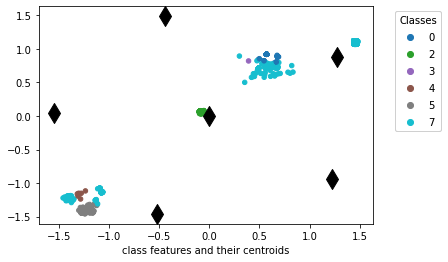

INFO:tensorflow:Assets written to: ram://4388fbcc-4670-43a9-a5e6-8aa89baa1825/assets


In [14]:
mlog = MixedLog(debug=False,
                mixed_logs=True,
                padded_seq_len=32, 
                padded_char_len=176, 
                log_meta_status='time_ip',                
                save_padded_num_sequences=False,
                load_from_pkl=True,
                                 )
train_test = mlog.get_tensor_train_val_test(ablation=1000)
train_data, val_data, test_data = train_test
oset = OpenSet()
res = oset.train(bglog=mlog, train_data=train_data, val_data=val_data, test_data=test_data, pt_epochs=5, oc_epochs=50)

In [19]:
res = oset.evaluate(data=val_data)

[[95  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 98]
 [ 0  0 94  0  0  0  0]
 [ 0  0  0 57  0  0 40]
 [ 0  0  0  0  8  0 91]
 [ 0  0  0  0  0 93  0]
 [ 0  0  0  0  0  0  0]]
60.24
f1_weighted: 0.639946064449569, f1_macro: 0.5556846357914449, f1_micro: 0.6024305555555556, f_measure: {'Known': 64.8299, 'Open': 0, 'F1-score': 55.5685}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       0.00      0.00      0.00        98
           2       1.00      1.00      1.00        94
           3       1.00      0.59      0.74        97
           4       1.00      0.08      0.15        99
           5       1.00      1.00      1.00        93
           7       0.00      0.00      0.00         0

    accuracy                           0.60       576
   macro avg       0.71      0.52      0.56       576
weighted avg       0.83      0.60      0.64       576



In [18]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 176), dtype=tf.int32, name=None), TensorSpec(shape=(32, 7), dtype=tf.float32, name=None))>

In [5]:
# le = preprocessing.LabelEncoder()
# lbl_encoded_cls = le.fit_transform(["tokyo", "tokyo", "paris", "amsterdam"])
# print('original text cls:' , list(le.classes_))
# cls_to_num_map = le.transform(le.classes_)
# print('cls_to_num_map:',cls_to_num_map)
# print('lbl_encoded_cls:', lbl_encoded_cls)
# lbl_decoded_cls = list(le.inverse_transform(lbl_encoded_cls))
# print('lbl_decoded_cls:', lbl_decoded_cls)
# categorical_cls = to_categorical(lbl_encoded_cls)
# print('categorical_cls:', categorical_cls)
# for idx, lbl in enumerate(categorical_cls):
#     categorical_to_labl_encode_item = np.argmax(categorical_cls[idx])
#     print(f'categorical_to_labl_encode_{idx}_item: {categorical_to_labl_encode_item}')
# # le.n_features_in_